Resolvamos las ecuaciones diferenciales de las geodesicas del toro. Resolvemos las ecuaciones de $\phi$ y $theta$, que integradas son:

$$
    \dot\phi = \pm\frac{1}{a}\frac{\sqrt{L(b+a\sin\phi)^2 - l^2}}{b+a\sin\phi} \\
    \dot\theta = \frac{l}{(b+a\sin\phi)^2}
$$

Donde $l = (b+a\sin\phi)^2\dot\theta$ y $L = (b+a\sin\phi)^2\dot\theta^2 +a^2\dot\phi^2$ son constantes del movimiento y vendrán determinadas por las condiciones iniciales.

Utilizaremos odeint para obtener $\phi(\tau)$, pero tambíen podríamos utilizar quad y sacar $\tau(\phi)$

Desmos util: https://www.desmos.com/3d/wpnx9updtl

In [1]:
import numpy as np
from scipy.integrate import odeint # https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html
import matplotlib.pyplot as plt

def toro(Y, t, a:float, b:float, L:float, l:float):
    phi, theta = Y
    w = (b+a*np.sin(phi))
    # Debemos devolver la derivada de Y = (dotphi, dottheta)
    # return [(1/a)*np.sqrt(L*w**2 - l**2)/w, l/w**2]
    return [(1/a)*np.sqrt(abs(L*w**2 - l**2))/w, l/w**2]

def resolver(t, a:float, b:float, phi_0:float, dotphi_0:float, theta_0:float, dottheta_0:float):
    # t es un linspace de los tiempos que quieras
    w = (b+a*np.sin(phi_0))
    l = dottheta_0*w**2
    L = (w**2)*(dottheta_0**2) + (a**2)*(dotphi_0)

    return odeint(toro, [phi_0, theta_0], t, args=(a, b, L, l))

Nos vamos a aprovechar del hecho de que si tomas la métrica dada del toro y haces que b = 0, obtienes la métrica de la esfera con radio a y con los ángulos $\phi$ cambiado por $\theta$ y viceversa. Si partimos de las coordenadas de la superficie esférica con esas características:

$$
    x = a\sin(\phi)\cos(\theta), y = a\sin(\phi)\sin(\theta), z = a\cos(\phi)
$$

Podemos hacer el cambio $a\sin(\phi) \rightarrow (b+a\sin(\phi))$ para obtener una parametrización adecuada del toro con el que estamos trabajando. Resulta:

$$
    x = (b+a\sin(\phi))\cos(\theta), y = (b+a\sin(\phi))\sin(\theta), z = a\cos(\phi)
$$

Y se puede comprobar que esta parametrización resulta en la métrica con la que empezamos.

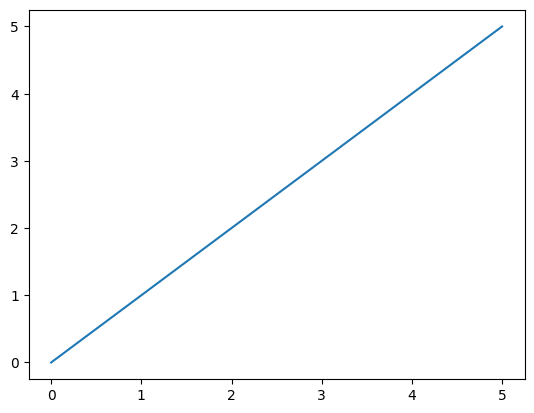

In [2]:
t = np.linspace(0, 5, 100)
phi = resolver(t, a=0.5, b=1, phi_0=0, dotphi_0=1, theta_0=0, dottheta_0=0)[:, 0]

plt.plot(t, phi)
plt.show()

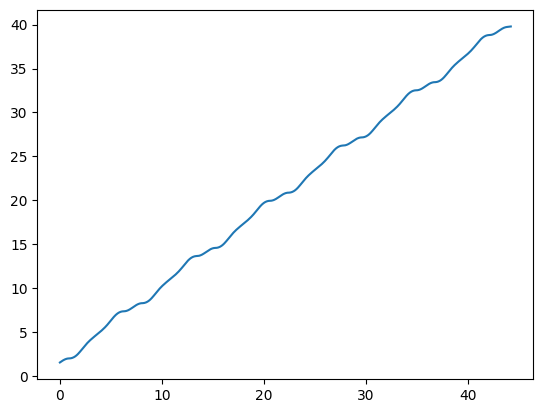

In [3]:
t = np.linspace(0, 10*np.pi, 1000)
# sol = resolver(t, a=0.5, b=1, phi_0=np.pi, dotphi_0=2**(-1/2), theta_0=1, dottheta_0=2**(-1/2))
sol = resolver(t, a=0.5, b=1, phi_0=np.pi/2, dotphi_0=1/2, theta_0=0, dottheta_0=(3/4)**0.5)
phi = sol[:, 0]
theta = sol[:, 1]

plt.plot(theta, phi)
# plt.xlim((0, 2*np.pi))
# plt.ylim((0, 2*np.pi))
plt.show()

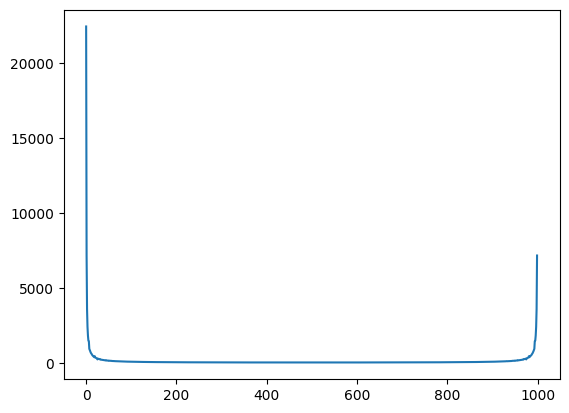

In [11]:
from scipy.fft import fft
t = np.linspace(0, 10*np.pi, 1000)
# sol = resolver(t, a=0.5, b=1, phi_0=np.pi, dotphi_0=2**(-1/2), theta_0=1, dottheta_0=2**(-1/2))
sol = resolver(t, a=0.5, b=1, phi_0=np.pi/2, dotphi_0=1/2, theta_0=0, dottheta_0=(3/4)**0.5)
phi = sol[:, 0]
theta = sol[:, 1]

plt.plot(np.abs(fft(theta)))
plt.show()

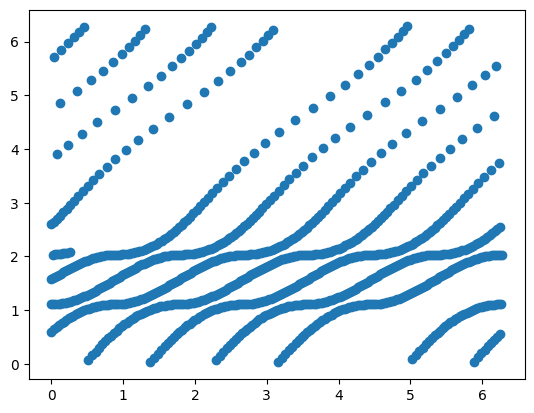

In [4]:
# En este metemos toda la curva en el cuadrado 2*pi por 2*pi
t = np.linspace(0, 10*np.pi, 1000)
# sol = resolver(t, a=0.5, b=1, phi_0=np.pi, dotphi_0=2**(-1/2), theta_0=1, dottheta_0=2**(-1/2))
sol = resolver(t, a=0.5, b=1, phi_0=np.pi/2, dotphi_0=1/2, theta_0=0, dottheta_0=(3/4)**0.5)
# K = ((2*np.pi)**(0.5))
# sol = resolver(t, a=0.5, b=1, phi_0=np.pi/2, dotphi_0=K*0.5, theta_0=0, dottheta_0=K*(3/4)**0.5)
phi = np.remainder(sol[:, 0], 2*np.pi)
theta = np.remainder(sol[:, 1], 2*np.pi)

plt.scatter(theta, phi)
# plt.xlim((0, 2*np.pi))
# plt.ylim((0, 2*np.pi))
plt.show()

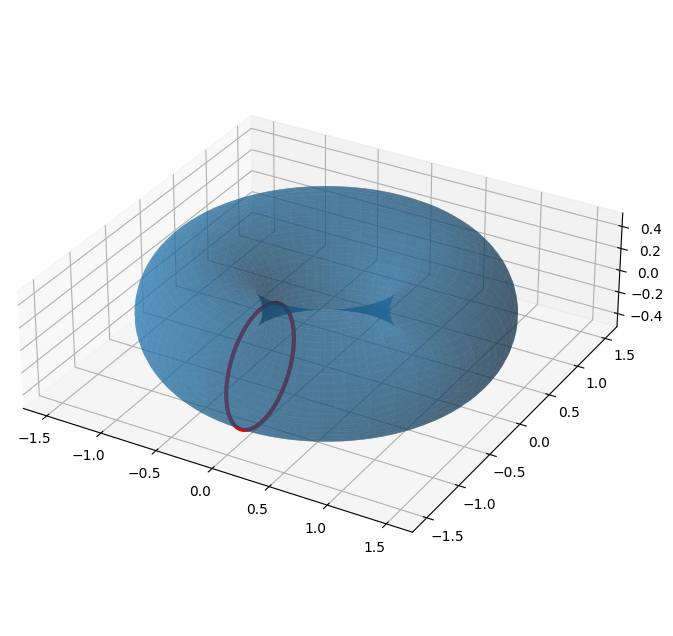

In [5]:
a = 0.5
b = 1

u = np.linspace(0, 2*np.pi, 100) # phi
v = np.linspace(0, 2*np.pi, 100) # theta

U, V = np.meshgrid(u, v)

X = (b+a*np.sin(U))*np.cos(V)
Y = (b+a*np.sin(U))*np.sin(V)
Z = a*np.cos(U)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8, 8))

superficie = ax.plot_surface(X, Y, Z, alpha=0.5)
#superficie = ax.plot_wireframe(X, Y, Z)

# Set an equal aspect ratio
ax.set_aspect('equal')

t = np.linspace(0, 2*np.pi, 100)
# Con: phi_0=0, dotphi_0=1, theta_0=0, dottheta_0=0 y  variando theta_0 obtienes los meridianos
sol = resolver(t, a, b, phi_0=0, dotphi_0=1, theta_0=(3/2)*np.pi, dottheta_0=0)
phi = sol[:, 0]
theta = sol[:, 1]

x = (b+a*np.sin(phi))*np.cos(theta)
y = (b+a*np.sin(phi))*np.sin(theta)
z = a*np.cos(phi)

geodesica = ax.plot(x, y, z, color="red", linewidth=3)

plt.show()

In [6]:
def representar_geodesica(t, a, b, phi_0, dotphi_0, theta_0, dottheta_0):
    u = np.linspace(0, 2*np.pi, 100) # phi
    v = np.linspace(0, 2*np.pi, 100) # theta

    U, V = np.meshgrid(u, v)

    X = (b+a*np.sin(U))*np.cos(V)
    Y = (b+a*np.sin(U))*np.sin(V)
    Z = a*np.cos(U)

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8, 8))

    superficie = ax.plot_surface(X, Y, Z, alpha=0.5)
    #superficie = ax.plot_wireframe(X, Y, Z)

    # Set an equal aspect ratio
    ax.set_aspect('equal')

    sol = resolver(t, a, b, phi_0=phi_0, dotphi_0=dotphi_0, theta_0=theta_0, dottheta_0=dottheta_0)
    phi = sol[:, 0]
    theta = sol[:, 1]

    x = (b+a*np.sin(phi))*np.cos(theta)
    y = (b+a*np.sin(phi))*np.sin(theta)
    z = a*np.cos(phi)

    geodesica = ax.plot(x, y, z, color="red", linewidth=3)

    x_0 = (b+a*np.sin(phi_0))*np.cos(theta_0)
    y_0 = (b+a*np.sin(phi_0))*np.sin(theta_0)
    z_0 = a*np.cos(phi_0)

    punto_inicial = ax.scatter(x_0, y_0, z_0, color="green")

    plt.show()

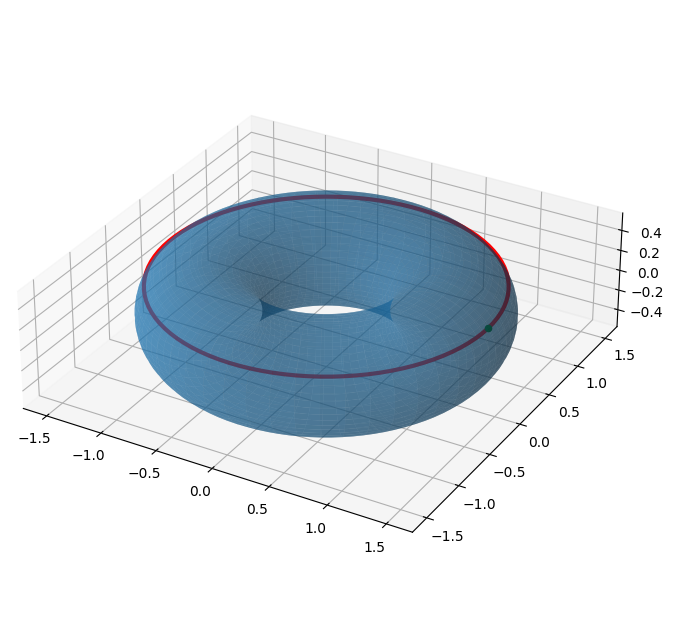

In [7]:
representar_geodesica(t=np.linspace(0, 2*np.pi, 100), a=0.5, b=1, phi_0=1, dotphi_0=0, theta_0=0, dottheta_0=1)

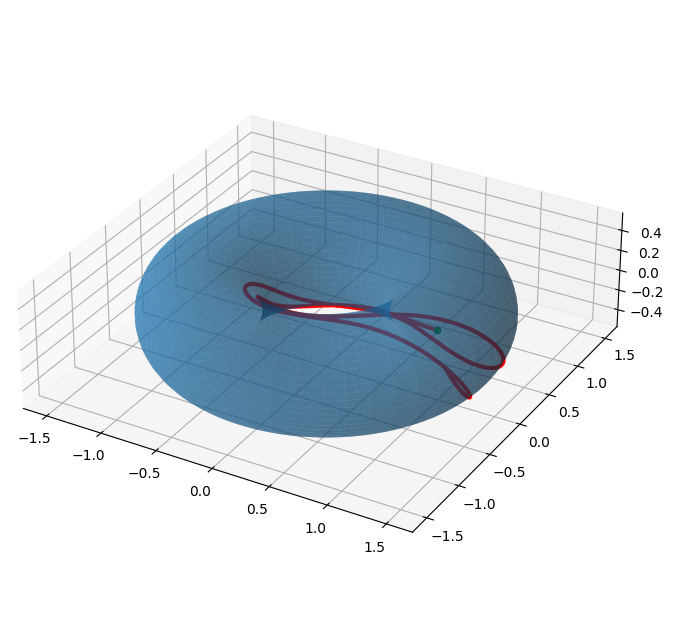

In [8]:
representar_geodesica(t=np.linspace(0, 4*np.pi, 500), a=0.5, b=1, phi_0=np.pi, dotphi_0=2**(-1/2), theta_0=1, dottheta_0=2**(-1/2))

No tengo claro que estas geodésicas estén bien. Se puede ver de las ecuaciones diferenciales sin integrar: 

$$
    \ddot \phi = \frac{1}{a}{\cos(\phi)}(b+a\sin(\phi))\dot\theta^2
$$

$$
    \ddot \theta = (\frac{-2a\cos(\phi)}{b+a\sin(\phi)}) \dot\phi \dot\theta
$$

que para $\dot \phi = 0$ se debe a que $\cos(\phi)(b+a\sin(\phi))\dot\theta^2 = 0$, suponiendo que b > a, solo pasa cuando $\cos(\phi) = 0$, $\phi = (2n+1)\pi/2$

Arriva vemos ecuaciones que no cumplen esto.

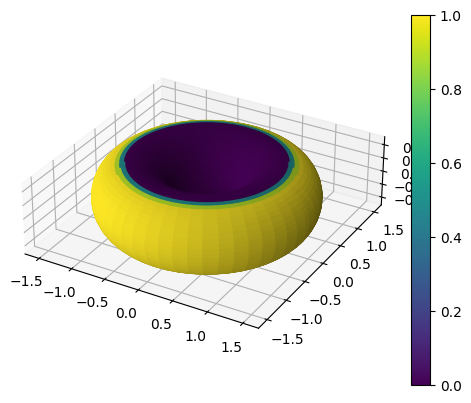

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
a, b = 0.5, 1

u = np.linspace(0, 2*np.pi, 100) # phi
v = np.linspace(0, 2*np.pi, 100) # theta

U, V = np.meshgrid(u, v)

X = (b+a*np.sin(U))*np.cos(V)
Y = (b+a*np.sin(U))*np.sin(V)
Z = a*np.cos(U)

E = 2*np.sin(U)/(a*(a*np.sin(U) + b))

# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
superficie = ax.plot_surface(X, Y, Z, facecolors=plt.cm.viridis(E)) # np.nan_to_num(E) Reemplazar nans con valores grandes

# Añadimos una colorbar
fig.colorbar(superficie)

# Set an equal aspect ratio
ax.set_aspect('equal')

plt.show()